In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from SplunkResearch.resources.section_logtypes import section_logtypes
import numpy as np
import joblib
from sklearn.linear_model import LinearRegression

In [2]:
section_logtypes = {'Detect New Local Admin account': [('wineventlog:security', '4732')],
                    'Windows Event For Service Disabled': [('wineventlog:system', '7040')],
                    "Known Services Killed by Ransomware": [('wineventlog:system', '7036')],
                    "Kerberoasting spn request with RC4 encryption": [('wineventlog:security', '4769')],
                    "Clop Ransomware Known Service Name": [('wineventlog:system', '7045')],
                    "Non Chrome Process Accessing Chrome Default Dir":[('wineventlog:security', '4663')],
                    'ESCU Network Share Discovery Via Dir Command Rule': [('wineventlog:security', '5140')],
                    'Windows AD Replication Request Initiated from Unsanctioned Location':[('wineventlog:security', '4662')],
                    'ESCU Windows Rapid Authentication On Multiple Hosts Rule': [('wineventlog:security', '4624')]}

In [3]:
fake_df = pd.read_csv('/home/shouei/GreenSecurity-FirstExperiment/SplunkResearch/resources/all_data.csv')
real_df = pd.read_csv('/home/shouei/GreenSecurity-FirstExperiment/SplunkResearch/resources/all_baseline_data.csv')


In [4]:
fake_df = fake_df[~(fake_df['time_range'].str.contains('08/01/2024')|fake_df['time_range'].str.contains('08/02/2024')|fake_df['time_range'].str.contains('08/03/2024')|fake_df['time_range'].str.contains('08/04/2024')|fake_df['time_range'].str.contains('08/05/2024')|fake_df['time_range'].str.contains('08/06/2024')|fake_df['time_range'].str.contains('08/07/2024')|fake_df['time_range'].str.contains('08/08/2024')|fake_df['time_range'].str.contains('08/09/2024')|fake_df['time_range'].str.contains('08/10/2024')|fake_df['time_range'].str.contains('08/11/2024'))]
rael_df = real_df[~(real_df['time_range'].str.contains('08/01/2024')|real_df['time_range'].str.contains('08/02/2024')|real_df['time_range'].str.contains('08/03/2024')|real_df['time_range'].str.contains('08/04/2024')|real_df['time_range'].str.contains('08/05/2024')|real_df['time_range'].str.contains('08/06/2024')|real_df['time_range'].str.contains('08/07/2024')|real_df['time_range'].str.contains('08/08/2024')|real_df['time_range'].str.contains('08/09/2024')|real_df['time_range'].str.contains('08/10/2024')|real_df['time_range'].str.contains('08/11/2024'))]

In [5]:
# ommit the prefix ac_fake_distribution and ac_real_distribution from the column names
fake_df.columns = [col.replace('ac_fake_distribution_', '') for col in fake_df.columns]
real_df.columns = [col.replace('ac_real_distribution_', '') for col in real_df.columns]

In [6]:
# drop in fake_Df rows that contains in columns that contaINS CPU with zero values
fake_df = fake_df[fake_df[fake_df.columns[fake_df.columns.str.contains('cpu')]].sum(axis=1) != 0]

In [17]:
X_distribution.columns = [col.replace('\'', '') for col in X_distribution.columns]
X_distribution

(wineventlog:security, 4624)  (wineventlog:security, 4625)  \
0                         0.228251                      0.029247   
1                         0.231048                      0.029682   
2                         0.237918                      0.029597   
3                         0.240375                      0.029861   
4                         0.246489                      0.029720   
...                            ...                           ...   
3667                      0.117584                      0.027745   
3668                      0.116611                      0.027745   
3669                      0.115137                      0.027745   
3670                      0.113247                      0.027745   
3671                      0.110346                      0.027745   

      (wineventlog:security, 4634)  (wineventlog:security, 4648)  \
0                         0.062700                      0.051360   
1                         0.063597                      0.051483   
2                         0.064920                      0.051908   
3                         0.065657                      0.051880   
4                         0.067094                      0.052116   
...                            ...                           ...   
3667                      0.042959                      0.047901   
3668                      0.042458                      0.047892   
3669                      0.041853                      0.047665   
3670                      0.041211                      0.047580   
3671                      0.040691                      0.047542   

      (wineventlog:security, 4662)  (wineventlog:security, 4663)  \
0                         0.270955                           0.0   
1                         0.273072                           0.0   
2                         0.275510                           0.0   
3                         0.277560                           0.0   
4                         0.280036                           0.0   
...                            ...                           ...   
3667                      0.329525                           0.0   
3668                      0.329487                           0.0   
3669                      0.329525                           0.0   
3670                      0.329487                           0.0   
3671                      0.329525                           0.0   

      (wineventlog:security, 4672)  (wineventlog:security, 4702)  \
0                         0.220200                      0.444964   
1                         0.222959                      0.450795   
2                         0.229716                      0.469638   
3                         0.231993                      0.474863   
4                         0.237862                      0.493621   
...                            ...                           ...   
3667                      0.114976                      0.261808   
3668                      0.114022                      0.253048   
3669                      0.112566                      0.242795   
3670                      0.110724                      0.234828   
3671                      0.107879                      0.224651   

      (wineventlog:security, 4732)  (wineventlog:security, 4735)  ...  \
0                              0.0                      0.062237  ...   
1                              0.0                      0.064429  ...   
2                              0.0                      0.066536  ...   
3                              0.0                      0.068436  ...   
4                              0.0                      0.070912  ...   
...                            ...                           ...  ...   
3667                           0.0                      0.028435  ...   
3668                           0.0                      0.027159  ...   
3669                           0.0                      0.025855  ...   
3670    

### Alert Forcasting

In [7]:
# for rule in section_logtypes:
#     for logtype, eventid in section_logtypes[rule]:
df = real_df              
X_distribution = df.iloc[:,df.columns.str.contains("wineventlog")]
# delete prefix ac_real_distribution_ from the column names
X_distribution.columns = [col.replace('ac_real_distribution_', '') for col in X_distribution.columns]
X_distribution.columns = [col.replace('\'', '') for col in X_distribution.columns]

# X_distribution = df.iloc[:,df.columns.str.contains(f"'{logtype}', '{eventid}'")]
# X_distribution = X_distribution.drop(columns=['other'])  # Drop the 'other' column if it exists

# X_distribution = X_distribution.iloc[:,X_distribution.columns.str.contains(eventid)]
# Normalize the distribution values
X_distribution = X_distribution.fillna(0)  # Fill NaN values with 0
dist_max = X_distribution.max().max()
dist_min = X_distribution.min().min()

# X_distribution['sum'] = X_distribution.sum(axis=1) / 100000
# X_distribution = X_distribution.apply(lambda x: x / x.sum(), axis=0)  # Normalize each column
models = {}
r_scores = []
X_distribution = X_distribution.apply(lambda x: (x - dist_min) / (dist_max - dist_min), axis=0)  # Normalize each column
X_distribution = X_distribution.fillna(0)  # Fill NaN values with 0
for rule in section_logtypes:
    for logtype, eventid in section_logtypes[rule]:

        X_alerts = df.iloc[:, df.columns.str.contains("alert")]
        X_alerts = X_alerts.iloc[:, X_alerts.columns.str.contains(rule)]
        
        # X_alerts = X_alerts.iloc[:, X_alerts.columns.str.contains(rule)]
        # normalize the alert values
        X_alerts = X_alerts.fillna(0)  # Fill NaN values with 0
        # X_alerts = X_alerts.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)  # Normalize each column
        # X_alerts = X_alerts.fillna(0)  # Fill NaN values with 0
        # X_alerts = X_alerts.fillna(0)  # Fill NaN values with 0
        
        X = X_distribution
        Y = X_alerts.sum(axis=1)

        # normalize the cpu values
        # Y = (Y - Y.min()) / (Y.max() - Y.min())  # Normalize the target variable
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
        regr1 = RandomForestRegressor(n_estimators=150, random_state=42)

        # regr2 = MLPRegressor(hidden_layer_sizes=(100, 100, 50), max_iter=5000)
        # regr3 = LinearRegression()
        for regr in [regr1]:
            
            regr.fit(X_train, y_train)
            # save model
            # joblib.dump(regr, f'model_all.joblib', protocol=4)
            # joblib.dump(regr, f'model_{rule}.joblib', protocol=4)
            y_pred = regr.predict(X_test)
            # clip negative values
            y_pred = np.clip(y_pred, 0, None)
            # round the values
            y_pred = np.round(y_pred)
            # print(f"Rule: {rule}, Model: {regr.__class__.__name__}")
            print(f"Rule: {rule}, Model: {regr.__class__.__name__}")
            
            print(f"Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))/ np.mean(y_test)}")
            r_score = regr.score(X_test, y_test)
            r_scores.append(r_score)
            print(f"R2 Score: {r_score}")
            models[f"{rule}_{regr.__class__.__name__}"] = regr
            # dump model
            joblib.dump(models[f"{rule}_{regr.__class__.__name__}"], f'models_{rule}_alerts.joblib', protocol=4)

#all model
X_alerts = df.iloc[:, df.columns.str.contains("alert")]

Y = X_alerts
Y = Y.sum(axis=1)
X = X_distribution

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
regr = RandomForestRegressor(n_estimators=150, random_state=42)
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"All Model: RandomForestRegressor")
print(f"Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))/ np.mean(y_test)}")
print(f"R2 Score: {regr.score(X_test, y_test)}")
print(f"Average R2 Score: {np.mean(r_scores)}")
# feature importance
importances = regr.feature_importances_
indices = np.argsort(importances)[::-1]
# print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]})")
models[f"All_RandomForestRegressor"] = regr
# dump all model
joblib.dump(models[f"All_RandomForestRegressor"], f'models_all_rules_alerts.joblib', protocol=4)


Rule: Detect New Local Admin account, Model: RandomForestRegressor
Mean Squared Error: 0.27460483934207947
R2 Score: 0.9968470309555344
Rule: Windows Event For Service Disabled, Model: RandomForestRegressor
Mean Squared Error: 0.26934389418238786
R2 Score: 0.9937363959780692
Rule: Known Services Killed by Ransomware, Model: RandomForestRegressor
Mean Squared Error: 0.3623307982955707
R2 Score: 0.9738707830567186
Rule: Kerberoasting spn request with RC4 encryption, Model: RandomForestRegressor
Mean Squared Error: nan


/tmp/ipykernel_13450/1925192057.py:61: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))/ np.mean(y_test)}")
/tmp/ipykernel_13450/1925192057.py:61: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))/ np.mean(y_test)}")


R2 Score: 1.0
Rule: Clop Ransomware Known Service Name, Model: RandomForestRegressor
Mean Squared Error: nan
R2 Score: 1.0
Rule: Non Chrome Process Accessing Chrome Default Dir, Model: RandomForestRegressor
Mean Squared Error: nan
R2 Score: 1.0
Rule: ESCU Network Share Discovery Via Dir Command Rule, Model: RandomForestRegressor
Mean Squared Error: nan
R2 Score: 1.0


/tmp/ipykernel_13450/1925192057.py:61: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))/ np.mean(y_test)}")
/tmp/ipykernel_13450/1925192057.py:61: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))/ np.mean(y_test)}")


Rule: Windows AD Replication Request Initiated from Unsanctioned Location, Model: RandomForestRegressor
Mean Squared Error: nan
R2 Score: 1.0


/tmp/ipykernel_13450/1925192057.py:61: RuntimeWarning: invalid value encountered in scalar divide
  print(f"Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))/ np.mean(y_test)}")


Rule: ESCU Windows Rapid Authentication On Multiple Hosts Rule, Model: RandomForestRegressor
Mean Squared Error: 1.0844353369380768
R2 Score: 0.9212675706512199
All Model: RandomForestRegressor
Mean Squared Error: 0.2612692129132538
R2 Score: 0.9840828380733662
Average R2 Score: 0.9873024200712825
Feature ranking:
1. feature (wineventlog:security, 4799) (0.43271439103915554)
2. feature (wineventlog:system, 7045) (0.21109299222523611)
3. feature (wineventlog:system, 44) (0.06564021414617313)
4. feature (wineventlog:security, 4625) (0.05621649927041941)
5. feature (wineventlog:system, 7036) (0.04846970335962485)
6. feature (wineventlog:security, 4732) (0.040561140959690455)
7. feature (wineventlog:security, 4662) (0.039146316288363237)
8. feature (wineventlog:security, 4907) (0.011353285130425373)
9. feature (wineventlog:security, 4648) (0.010890846284173387)
10. feature (wineventlog:system, 12) (0.010470210261971268)
11. feature (wineventlog:system, 7) (0.007453972663564876)
12. feature

['models_all_rules_alerts.joblib']

In [14]:
X_distribution

('wineventlog:security', '4624')  ('wineventlog:security', '4625')  \
0                             0.228251                          0.029247   
1                             0.231048                          0.029682   
2                             0.237918                          0.029597   
3                             0.240375                          0.029861   
4                             0.246489                          0.029720   
...                                ...                               ...   
3667                          0.117584                          0.027745   
3668                          0.116611                          0.027745   
3669                          0.115137                          0.027745   
3670                          0.113247                          0.027745   
3671                          0.110346                          0.027745   

      ('wineventlog:security', '4634')  ('wineventlog:security', '4648')  \
0                             0.062700                          0.051360   
1                             0.063597                          0.051483   
2                             0.064920                          0.051908   
3                             0.065657                          0.051880   
4                             0.067094                          0.052116   
...                                ...                               ...   
3667                          0.042959                          0.047901   
3668                          0.042458                          0.047892   
3669                          0.041853                          0.047665   
3670                          0.041211                          0.047580   
3671                          0.040691                          0.047542   

      ('wineventlog:security', '4662')  ('wineventlog:security', '4663')  \
0                             0.270955                               0.0   
1                             0.273072                               0.0   
2                             0.275510                               0.0   
3                             0.277560                               0.0   
4                             0.280036                               0.0   
...                                ...                               ...   
3667                          0.329525                               0.0   
3668                          0.329487                               0.0   
3669                          0.329525                               0.0   
3670                          0.329487                               0.0   
3671                          0.329525                               0.0   

      ('wineventlog:security', '4672')  ('wineventlog:security', '4702')  \
0                             0.220200                          0.444964   
1                             0.222959                          0.450795   
2                             0.229716                          0.469638   
3                             0.231993                          0.474863   
4                             0.237862                          0.493621   
...                                ...                               ...   
3667                          0.114976                          0.261808   
3668                          0.114022                          0.253048   
3669                          0.112566                          0.242795   
3670                          0.110724                          0.234828   
3671                          0.107879                          0.224651   

      ('wineventlog:security', '4732')  ('wineventlog:security', '4735')  ...  \
0                                  0.0                          0.062237  ...   
1                                  0.0                          0.064429  ...   
2                                  0.0                          0.066536  ...   
3                             

### CPU Forcasting

In [12]:
# for rule in section_logtypes:
#     for logtype, eventid in section_logtypes[rule]:
df = pd.concat([fake_df, real_df], axis=0)              
X_distribution = df.iloc[:,df.columns.str.contains("wineventlog")]
# X_distribution = df.iloc[:,df.columns.str.contains(f"'{logtype}', '{eventid}'")]
# X_distribution = X_distribution.drop(columns=['other'])  # Drop the 'other' column if it exists

# X_distribution = X_distribution.iloc[:,X_distribution.columns.str.contains(eventid)]
# Normalize the distribution values
X_distribution = X_distribution.fillna(0)  # Fill NaN values with 0
dist_max = X_distribution.max().max()
dist_min = X_distribution.min().min()

# X_distribution['sum'] = X_distribution.sum(axis=1) / 100000
# X_distribution = X_distribution.apply(lambda x: x / x.sum(), axis=0)  # Normalize each column
models = {}
r_scores = []
X_distribution = X_distribution.apply(lambda x: (x - dist_min) / (dist_max - dist_min), axis=0)  # Normalize each column
X_distribution = X_distribution.fillna(0)  # Fill NaN values with 0
# for rule in section_logtypes:
#     for logtype, eventid in section_logtypes[rule]:

#         X_alerts = df.iloc[:, df.columns.str.contains("alert")]
#         X_alerts = X_alerts.iloc[:, X_alerts.columns.str.contains(rule)]
        
#         # X_alerts = X_alerts.iloc[:, X_alerts.columns.str.contains(rule)]
#         # normalize the alert values
#         X_alerts = X_alerts.fillna(0)  # Fill NaN values with 0
#         X_alerts = X_alerts.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)  # Normalize each column
#         X_alerts = X_alerts.fillna(0)  # Fill NaN values with 0
#         X_alerts = X_alerts.fillna(0)  # Fill NaN values with 0
        
#         # X = X_distribution
#         X = pd.concat([X_distribution, X_alerts], axis=1)
#         Y = df.loc[:, df.columns.str.contains("cpu")]
#         Y = Y.loc[:, Y.columns.str.contains(rule)].sum(axis=1)
#         # Y = X_alerts.sum(axis=1)

#         # normalize the cpu values
#         # Y = (Y - Y.min()) / (Y.max() - Y.min())  # Normalize the target variable
#         X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
#         # regr1 = RandomForestRegressor(n_estimators=150, random_state=42)

#         regr = MLPRegressor()
#         # regr3 = LinearRegression()
#         for regr in [regr]:
            
#             regr.fit(X_train, y_train)
#             # save model
#             # joblib.dump(regr, f'model_all.joblib', protocol=4)
#             # joblib.dump(regr, f'model_{rule}.joblib', protocol=4)
#             y_pred = regr.predict(X_test)
#             # clip negative values
#             # y_pred = np.clip(y_pred, 0, None)
#             # round the values
#             # y_pred = np.round(y_pred)
#             # print(f"Rule: {rule}, Model: {regr.__class__.__name__}")
#             print(f"Rule: {rule}, Model: {regr.__class__.__name__}")
            
#             print(f"Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))/ np.mean(y_test)}")
#             r_score = regr.score(X_test, y_test)
#             r_scores.append(r_score)
#             print(f"R2 Score: {r_score}")
#             models[f"{rule}_{regr.__class__.__name__}"] = regr

#all model
X_alerts = df.iloc[:, df.columns.str.contains("alert")]

# Y = X_alerts
Y = df.loc[:, df.columns.str.contains("cpu")]
Y = Y.sum(axis=1)
# X = X_distribution
X = pd.concat([X_distribution, X_alerts], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
regr = RandomForestRegressor(n_estimators=50, random_state=42)
# regr = MLPRegressor()
regr.fit(X_train, y_train)
y_pred = regr.predict(X_test)
print(f"All Model: RandomForestRegressor")
print(f"Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred))/ np.mean(y_test)}")
print(f"R2 Score: {regr.score(X_test, y_test)}")
print(f"Average R2 Score: {np.mean(r_scores)}")
# feature importance
importances = regr.feature_importances_
indices = np.argsort(importances)[::-1]
# print the feature ranking
print("Feature ranking:")
for f in range(X.shape[1]):
    print(f"{f + 1}. feature {X.columns[indices[f]]} ({importances[indices[f]]})")
models[f"All_RandomForestRegressor"] = regr
# dump all model
joblib.dump(models[f"All_RandomForestRegressor"], f'models_all_rules_cpu.joblib', protocol=4)


All Model: RandomForestRegressor
Mean Squared Error: 0.14381048876955077
R2 Score: 0.8023714912479261
Average R2 Score: nan
Feature ranking:
1. feature raw_metrics_Windows AD Replication Request Initiated from Unsanctioned Location_alert (0.4681032665464127)
2. feature ('wineventlog:security', '4662') (0.040434527511241485)
3. feature ('wineventlog:system', '108') (0.03675439024907378)
4. feature ('wineventlog:system', '1500') (0.030435728297624552)
5. feature ('wineventlog:security', '4769') (0.029966310379156348)
6. feature ('wineventlog:system', '7') (0.028085222892473182)
7. feature ('wineventlog:system', '7036') (0.02790176530058101)
8. feature ('wineventlog:security', '4732') (0.026489355265750816)
9. feature raw_metrics_Detect New Local Admin account_alert (0.024943196821174973)
10. feature raw_metrics_Known Services Killed by Ransomware_alert (0.02005241444858879)
11. feature ('wineventlog:security', '4799') (0.01894232982982734)
12. feature ('wineventlog:system', '7045') (0.01

/home/shouei/anaconda3/envs/py310_modelenv/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/shouei/anaconda3/envs/py310_modelenv/lib/python3.8/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


['models_all_rules_cpu.joblib']

In [14]:
std_preds

array([ 0.12814972,  6.98573084,  4.75389001, ...,  5.50185911,
       21.75302543,  8.732508  ])

/home/shouei/anaconda3/envs/py310_modelenv/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/shouei/anaconda3/envs/py310_modelenv/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/shouei/anaconda3/envs/py310_modelenv/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/shouei/anaconda3/envs/py310_modelenv/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(
/home/shouei/anaconda3/envs/py310_modelenv/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warni

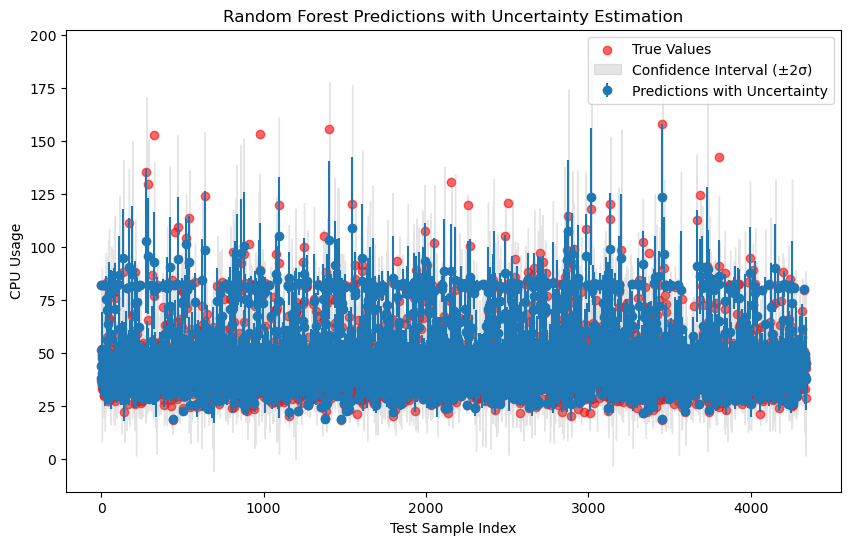

In [13]:

all_preds = np.array([tree.predict(X_test) for tree in regr.estimators_])

# Mean prediction
mean_preds = np.mean(all_preds, axis=0)

# Standard deviation = uncertainty estimate
std_preds = np.std(all_preds, axis=0)
plt.figure(figsize=(10, 6))
plt.errorbar(range(len(y_test)), mean_preds, yerr=std_preds, fmt='o', label='Predictions with Uncertainty')
plt.scatter(range(len(y_test)), y_test, color='red', label='True Values', alpha=0.6)
plt.fill_between(range(len(y_test)), mean_preds - 2*std_preds, mean_preds + 2*std_preds, color='gray', alpha=0.2, label='Confidence Interval (±2σ)')
plt.xlabel('Test Sample Index')

plt.ylabel('CPU Usage')
plt.title('Random Forest Predictions with Uncertainty Estimation')
plt.legend()
plt.show()


In [10]:
joblib.dump(regr, f'mlp_models_all_rules_cpu.joblib', protocol=4)

['mlp_models_all_rules_cpu.joblib']

In [55]:
Y = fake_df.loc[:, fake_df.columns.str.contains("cpu")]
Y.loc[:, Y.columns.str.contains(rule)].sum(axis=1)

0        3.59
2        2.28
3        2.71
4        2.17
5        1.81
         ... 
49868    0.00
49869    0.00
49870    0.00
49871    0.00
49872    0.00
Length: 49171, dtype: float64

In [79]:
y_pred_fake_all

array([40.4253, 40.6976, 55.5401, ..., 57.7269, 56.0624, 57.8703])

In [80]:
Y_all

0         55.69
2         59.58
3         54.68
4         47.26
5         44.85
          ...  
49581     91.22
49618    106.63
49686     99.54
49816     78.60
49825     79.43
Length: 15794, dtype: float64

In [77]:
# predict the cpu usage of fake df
X_distribution_fake = fake_df.iloc[:,fake_df.columns.str.contains("wineventlog")]
X_distribution_fake = X_distribution_fake.fillna(0)  # Fill NaN values with 0
X_distribution_fake = X_distribution_fake.apply(lambda x: (x - dist_min) / (dist_max - dist_min), axis=0)  # Normalize each column
X_distribution_fake = X_distribution_fake.fillna(0)  # Fill NaN values with 0
X_alerts_fake = fake_df.iloc[:, fake_df.columns.str.contains("alert")]

for rule in section_logtypes:
    for logtype, eventid in section_logtypes[rule]:

        X_alerts_fake_rule = X_alerts_fake.iloc[:, X_alerts_fake.columns.str.contains(rule)]
        
        # normalize the alert values
        X_alerts_fake_rule = X_alerts_fake_rule.fillna(0)  # Fill NaN values with 0
        X_alerts_fake_rule = X_alerts_fake_rule.apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)  # Normalize each column
        X_alerts_fake_rule = X_alerts_fake_rule.fillna(0)  # Fill NaN values with 0
        
        # X = X_distribution
        X_fake = pd.concat([X_distribution_fake, X_alerts_fake_rule], axis=1)
        Y = fake_df.loc[:, fake_df.columns.str.contains("cpu")]
        Y = Y.loc[:, Y.columns.str.contains(rule)].sum(axis=1)
        # Y = X_alerts.sum(axis=1)

        # normalize the cpu values
        # Y = (Y - Y.min()) / (Y.max() - Y.min())  # Normalize the target variable

        model = models.get(f"{rule}_RandomForestRegressor")
        if model:
            y_pred_fake = model.predict(X_fake)
            # clip negative values
            # y_pred_fake = np.clip(y_pred_fake, 0, None)
            # round the values
            # y_pred_fake = np.round(y_pred_fake)
            print(f"Rule: {rule}, Model: RandomForestRegressor")
            # evaluate the prediction
            print(f"R2 Score: {model.score(X_fake, Y)}")
            
X_fake_all = pd.concat([X_distribution_fake, X_alerts_fake], axis=1)
model_all = models.get(f"All_RandomForestRegressor")
if model_all:
    y_pred_fake_all = model_all.predict(X_fake_all)
    # clip negative values
    # y_pred_fake_all = np.clip(y_pred_fake_all, 0, None)
    # round the values
    # y_pred_fake_all = np.round(y_pred_fake_all)
    Y_all = fake_df.loc[:, fake_df.columns.str.contains("cpu")]
    Y_all = Y_all.sum(axis=1)
    print(f"All Model: RandomForestRegressor")
    print(f"R2 Score: {model_all.score(X_fake_all, Y_all)}")
    

Rule: Detect New Local Admin account, Model: RandomForestRegressor
R2 Score: -0.7574821451199976
Rule: Windows Event For Service Disabled, Model: RandomForestRegressor
R2 Score: -1.0868919048889332
Rule: Known Services Killed by Ransomware, Model: RandomForestRegressor
R2 Score: -0.5820954080529104
Rule: Kerberoasting spn request with RC4 encryption, Model: RandomForestRegressor
R2 Score: -0.7768580218777741
Rule: Clop Ransomware Known Service Name, Model: RandomForestRegressor
R2 Score: -0.1900981917650746
Rule: Non Chrome Process Accessing Chrome Default Dir, Model: RandomForestRegressor
R2 Score: -0.8860488005980078
Rule: ESCU Network Share Discovery Via Dir Command Rule, Model: RandomForestRegressor
R2 Score: -0.8521552019999199
Rule: Windows AD Replication Request Initiated from Unsanctioned Location, Model: RandomForestRegressor
R2 Score: -0.13602894401525156
Rule: ESCU Windows Rapid Authentication On Multiple Hosts Rule, Model: RandomForestRegressor
R2 Score: -0.1986933255041312